# Task

#### Build a Convolutional Neural Network (CNN) model to classify images from a given dataset into predefined categories/classes.

## The Dataset

#### The dataset for this task is the CIFAR-10 dataset

#### - 60,000 32x32 color images in 10 classes
#### - 6,000 images per class.

## Imports

In [ ]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
os.environ["TF_XLA_FLAGS"] = "--tf_xla_enable_xla_devices=false"
os.environ["XLA_FLAGS"] = "--xla_gpu_enable_latency_hiding_scheduler=false"
import sys, os
class _DevNull:
    def write(self, *_): pass
    def flush(self): pass

sys.stderr = _DevNull()

I0000 00:00:1769688067.753174   99270 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1769688067.828774   99270 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1769688067.828854   99270 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1769688067.831418   99270 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1769688067.831447   99270 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

In [2]:
import os
import pickle
import random
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.backend import clear_session
from tensorflow.keras.optimizers import SGD, Adam, Adagrad
from tensorflow.keras.metrics import TopKCategoricalAccuracy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.utils import image_dataset_from_directory, to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D, BatchNormalization, Activation, RandomFlip, RandomTranslation

## Setting the random seed

In [3]:
seed = 42
os.environ["PYTHONHASHSEED"] = str(seed)
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

## Load CIFAR-10 dataset

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## Data Exploration

In [5]:
print('X_train: ' ,X_train.shape)
print('X_test: ' ,X_test.shape)
print('y_train: ' ,y_train.shape)
print('y_test: ' ,y_test.shape)

X_train:  (50000, 32, 32, 3)
X_test:  (10000, 32, 32, 3)
y_train:  (50000, 1)
y_test:  (10000, 1)


In [6]:
class_names = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [7]:
unique, counts = np.unique(y_train, return_counts=True)
for u, c in zip(unique, counts):
    print(class_names[u], c)

airplane 5000
automobile 5000
bird 5000
cat 5000
deer 5000
dog 5000
frog 5000
horse 5000
ship 5000
truck 5000


### Check the min max pixel value

In [8]:
print("Min pixel value:", X_train.min())
print("Max pixel value:", X_train.max())

Min pixel value: 0
Max pixel value: 255


## Data Preprocessing 

### OHE y to categorical 

In [9]:
num_classes = 10
y_train_ohe = to_categorical(y_train, num_classes)
y_test_ohe  = to_categorical(y_test,  num_classes)

In [10]:
print('y_train_ohe: ' ,y_train_ohe.shape)
print('y_test_ohe: ' ,y_test_ohe.shape)

y_train_ohe:  (50000, 10)
y_test_ohe:  (10000, 10)


### Normalize the training and test

In [11]:
X_train = X_train.astype('float32')/255.0

In [12]:
X_test = X_test.astype('float32')/255.0

In [13]:
mean_train = X_train.mean(axis=(0,1,2))
std_train  = X_train.std(axis=(0,1,2))

mean_test = X_test.mean(axis=(0,1,2))
std_test  = X_test.std(axis=(0,1,2))


print("Mean:", mean_train)
print("Std:", std_train)
print("Mean:", mean_test)
print("Std:", std_test)

Mean: [0.4914009  0.48215896 0.4465308 ]
Std: [0.24703279 0.24348423 0.26158753]
Mean: [0.49421427 0.4851322  0.45040992]
Std: [0.24665268 0.24289216 0.2615922 ]


### Baseline model

In [14]:
model = Sequential([
                    Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3))
                    ,MaxPooling2D(pool_size=(2, 2))
                    ,Flatten()
                    ,Dense(100, activation='relu')
                    ,Dense(10, activation='softmax')
                    ])

In [15]:
model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [16]:
history = model.fit(X_train,
                    y_train_ohe, 
                    validation_split=0.1, 
                    epochs= 50, 
                    batch_size=128, 
                    verbose=1)

Epoch 1/50
352/352 [==============================] - 3s 6ms/step - loss: 1.5266 - accuracy: 0.4558 - val_loss: 1.2946 - val_accuracy: 0.5450
Epoch 2/50
352/352 [==============================] - 2s 5ms/step - loss: 1.2372 - accuracy: 0.5650 - val_loss: 1.2091 - val_accuracy: 0.5804
Epoch 3/50
352/352 [==============================] - 2s 5ms/step - loss: 1.1354 - accuracy: 0.6027 - val_loss: 1.1194 - val_accuracy: 0.6138
Epoch 4/50
352/352 [==============================] - 2s 5ms/step - loss: 1.0563 - accuracy: 0.6321 - val_loss: 1.1252 - val_accuracy: 0.6052
Epoch 5/50
352/352 [==============================] - 2s 5ms/step - loss: 0.9911 - accuracy: 0.6553 - val_loss: 1.0934 - val_accuracy: 0.6164
Epoch 6/50
352/352 [==============================] - 2s 5ms/step - loss: 0.9327 - accuracy: 0.6771 - val_loss: 1.0486 - val_accuracy: 0.6352
Epoch 7/50
352/352 [==============================] - 2s 5ms/step - loss: 0.8770 - accuracy: 0.6963 - val_loss: 1.0365 - val_accuracy: 0.6578
Epoch 

In [17]:
test_loss, test_acc = model.evaluate(X_test, y_test_ohe , verbose=1)
print("Test accuracy:", test_acc)
print("Test loss:", test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 2.7476 - accuracy: 0.6302
Test accuracy: 0.6302000284194946
Test loss: 2.747616767883301


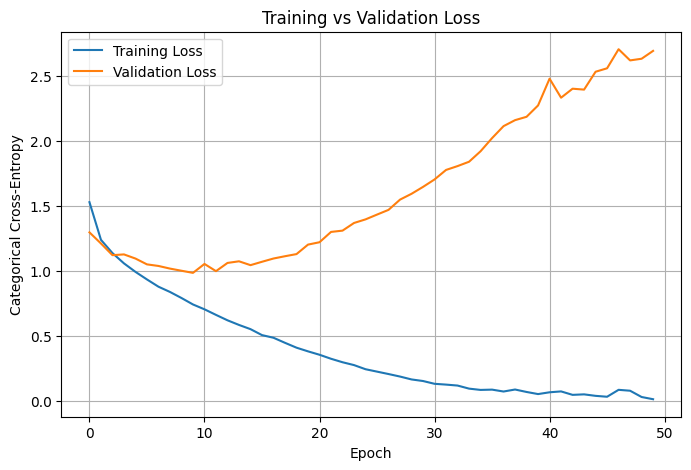

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Categorical Cross-Entropy')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [19]:
y_pred_proba = model.predict(X_test, batch_size=128, verbose=1)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test_ohe, axis=1)

79/79 [==============================] - 0s 2ms/step


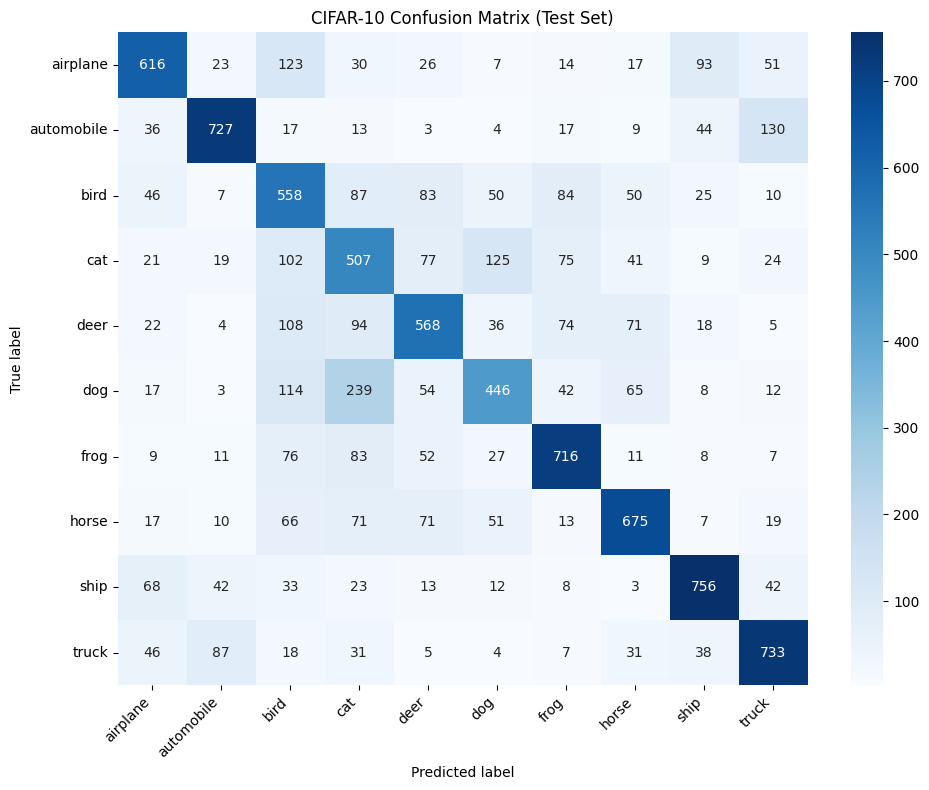

In [20]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("CIFAR-10 Confusion Matrix (Test Set)")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Add early stopping

In [21]:
clear_session()

In [22]:
model = Sequential([
                    Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3))
                    ,MaxPooling2D(pool_size=(2, 2))
                    ,Flatten()
                    ,Dense(100, activation='relu')
                    ,Dense(10, activation='softmax')
                    ])

model.compile(
    optimizer='adam',
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

In [23]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

In [24]:
history = model.fit(
    X_train, y_train_ohe,
    validation_split=0.1,
    epochs=50,
    batch_size=128,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
352/352 [==============================] - 2s 5ms/step - loss: 1.6429 - accuracy: 0.4191 - val_loss: 1.3811 - val_accuracy: 0.5228
Epoch 2/50
352/352 [==============================] - 2s 5ms/step - loss: 1.3008 - accuracy: 0.5420 - val_loss: 1.2321 - val_accuracy: 0.5724
Epoch 3/50
352/352 [==============================] - 2s 5ms/step - loss: 1.1872 - accuracy: 0.5861 - val_loss: 1.1803 - val_accuracy: 0.5906
Epoch 4/50
352/352 [==============================] - 2s 5ms/step - loss: 1.1137 - accuracy: 0.6128 - val_loss: 1.1726 - val_accuracy: 0.5852
Epoch 5/50
352/352 [==============================] - 2s 5ms/step - loss: 1.0568 - accuracy: 0.6320 - val_loss: 1.1217 - val_accuracy: 0.6122
Epoch 6/50
352/352 [==============================] - 2s 5ms/step - loss: 1.0135 - accuracy: 0.6476 - val_loss: 1.1114 - val_accuracy: 0.6092
Epoch 7/50
352/352 [==============================] - 2s 5ms/step - loss: 0.9688 - accuracy: 0.6652 - val_loss: 1.0728 - val_accuracy: 0.6406
Epoch 

313/313 [==============================] - 1s 3ms/step - loss: 1.0536 - accuracy: 0.6400
Test accuracy: 0.6399999856948853
Test loss: 1.0536165237426758


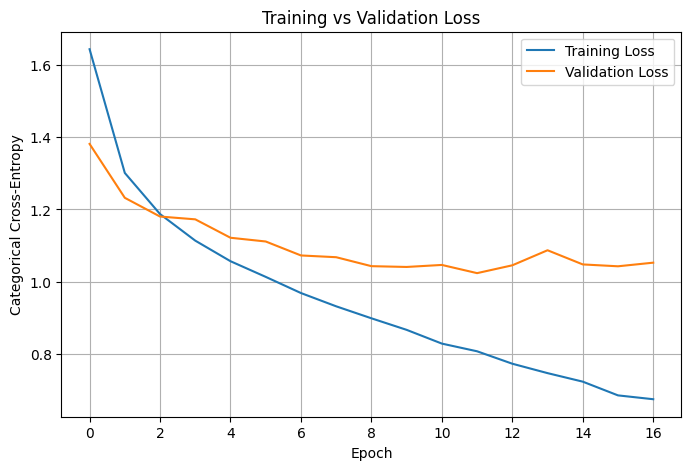

In [25]:
test_loss, test_acc = model.evaluate(X_test, y_test_ohe , verbose=1)
print("Test accuracy:", test_acc)
print("Test loss:", test_loss)

plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Categorical Cross-Entropy')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
y_pred_proba = model.predict(X_test, batch_size=128, verbose=1)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test_ohe, axis=1)

79/79 [==============================] - 0s 1ms/step


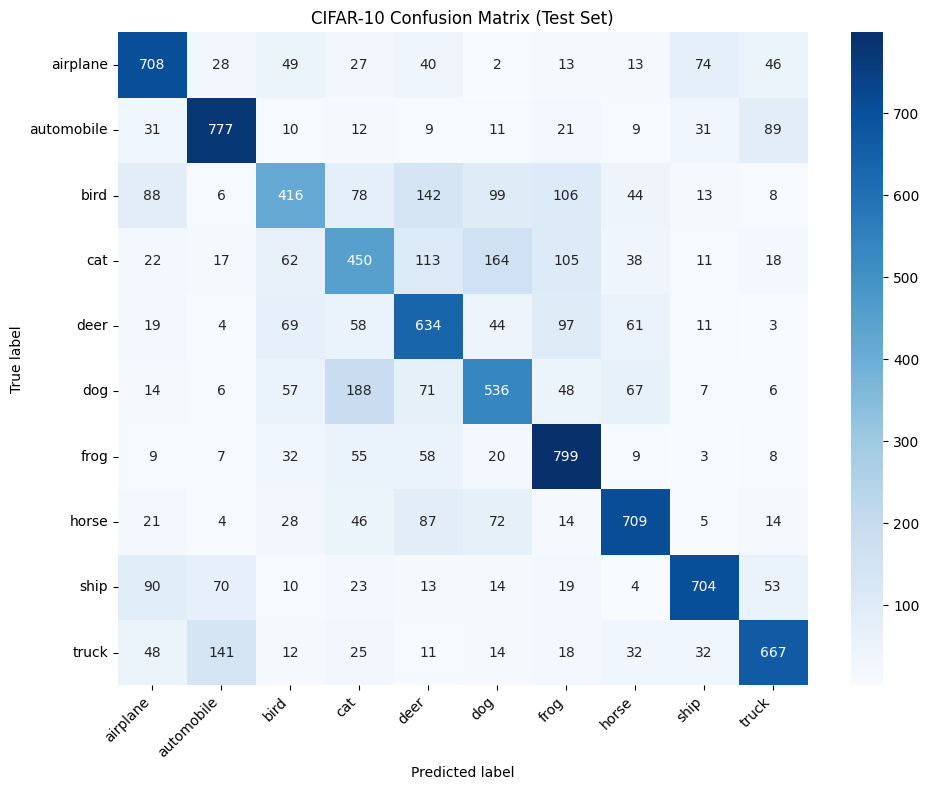

In [27]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)

plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("CIFAR-10 Confusion Matrix (Test Set)")
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

## Challenger 9: 

In [61]:
challenger_9 = Sequential([
    RandomFlip("horizontal"),
    RandomTranslation(0.025, 0.025),

    Conv2D(64, (3,3), padding="same", activation="relu", input_shape=(32,32,3)),
    Conv2D(64, (3,3), padding="same", activation="relu"),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(128, (3,3), padding="same", activation="relu"),
    Conv2D(128, (3,3), padding="same", activation="relu"),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    GlobalAveragePooling2D(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

challenger_9.compile(
    optimizer=SGD(learning_rate=0.05, momentum=0.9, nesterov=True),
    loss="categorical_crossentropy",
    metrics=["accuracy", TopKCategoricalAccuracy(k=3, name="top3_accuracy")]
)

In [62]:
ckpt_9 = tf.keras.callbacks.ModelCheckpoint(
    "runs/model_09.keras",
    monitor="val_accuracy",
    mode="max",
    save_best_only=True,
    verbose=1
)

challenger_9_history = challenger_9.fit(
    X_train, y_train_ohe,
    validation_split=0.1,
    epochs=80,
    batch_size=128,
    callbacks=[early_stop, ckpt_9, reduce_lr],
    verbose=1
)

Epoch 1/80
348/352 [============================>.] - ETA: 0s - loss: 2.1033 - accuracy: 0.2016 - top3_accuracy: 0.5138
Epoch 1: val_accuracy improved from -inf to 0.27700, saving model to runs/model_09.keras
352/352 [==============================] - 5s 11ms/step - loss: 2.1022 - accuracy: 0.2018 - top3_accuracy: 0.5147 - val_loss: 1.9163 - val_accuracy: 0.2770 - val_top3_accuracy: 0.6350 - lr: 0.0500
Epoch 2/80
352/352 [==============================] - ETA: 0s - loss: 1.8336 - accuracy: 0.3010 - top3_accuracy: 0.6723
Epoch 2: val_accuracy improved from 0.27700 to 0.35060, saving model to runs/model_09.keras
352/352 [==============================] - 4s 11ms/step - loss: 1.8336 - accuracy: 0.3010 - top3_accuracy: 0.6723 - val_loss: 1.7396 - val_accuracy: 0.3506 - val_top3_accuracy: 0.7194 - lr: 0.0500
Epoch 3/80
351/352 [============================>.] - ETA: 0s - loss: 1.6332 - accuracy: 0.3865 - top3_accuracy: 0.7512
Epoch 3: val_accuracy improved from 0.35060 to 0.46200, saving mo

In [73]:
h = challenger_9_history.history
print("epochs_ran:", len(h["loss"]))
print("final_train_acc:", h["accuracy"][-1])
print("best_val_acc:", max(h["val_accuracy"]))
print("best_val_loss:", min(h["val_loss"]))

epochs_ran: 38
final_train_acc: 0.8297333121299744
best_val_acc: 0.8166000247001648
best_val_loss: 0.53898686170578


In [64]:
import tensorflow as tf
best_model_09 = tf.keras.models.load_model("runs/model_09.keras")
test_loss, test_acc, test_top3_acc = best_model_09.evaluate(X_test, y_test_ohe, verbose=0)
print(test_acc, test_loss, test_top3_acc)

0.8113999962806702 0.5555737018585205 0.9621999859809875


In [65]:
challenger_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_1 (RandomFlip)  (None, 32, 32, 3)         0         
                                                                 
 random_translation_1 (Rand  (None, 32, 32, 3)         0         
 omTranslation)                                                  
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 conv2d_26 (Conv2D)          (None, 32, 32, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_19 (Dropout)        (None, 16, 16, 64)       

In [66]:
min(challenger_9_history.history["val_loss"])

0.53898686170578